## K Means Clustering
K Means is unsupervised clustering algorithm. It is used to orgranize unlabeled data points into clusters. The idea here is to create `K` number of different clusters, each having data points with similar property or pattern. The value of `K` is decided by the practitioner based on the data and domain. However we can also use `Elbow Method` to decide the value of k. 

## How K Means works
> 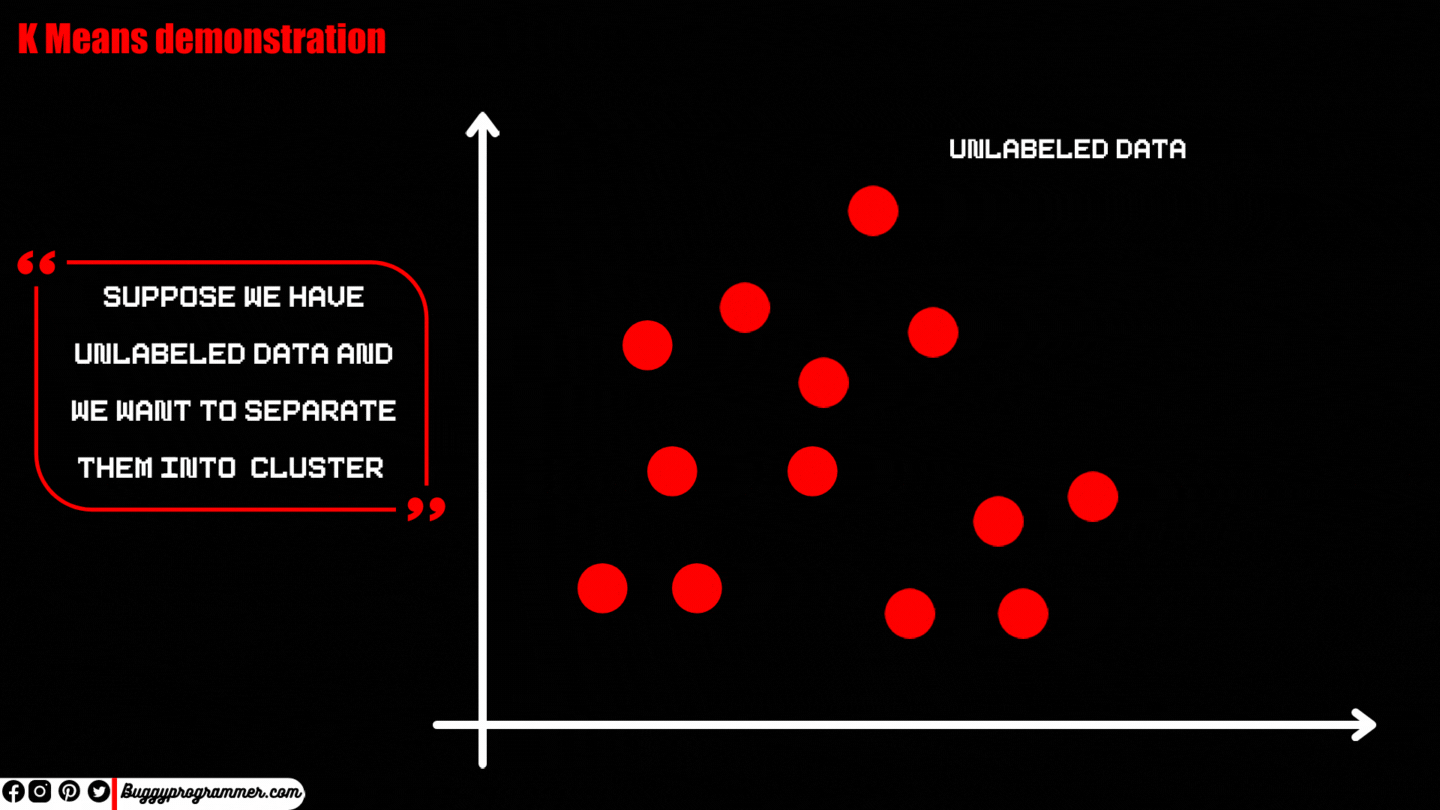

**Step 1** →  We first decide the value of `K`  which is the number of clusters.

**Step 2** → Then we randomly choose the K number of Centroid (center of data points, initially we choose it randomly) which represents the center of a particular cluster. For example, if we choose K’s value to be 2 then we will have two clusters and each cluster will have one Centroid.

**Step 3** → After that we calculate the distance of each data point from each centroid we created and then we assign those data points to its closest cluster. For example If the distance of a  data point `P` from the centroid `A` is 5 and from the centroid `B` is 7 then the data point `P` will be assigned to centroid `A`.

**Step 4** → After we assign each data point to its closest cluster, we then agian calculate the centroid of each cluster.

**Step 5** → And after that we repeat the step 3 and 4 until it’s fully optimized.

## Elbow method
> 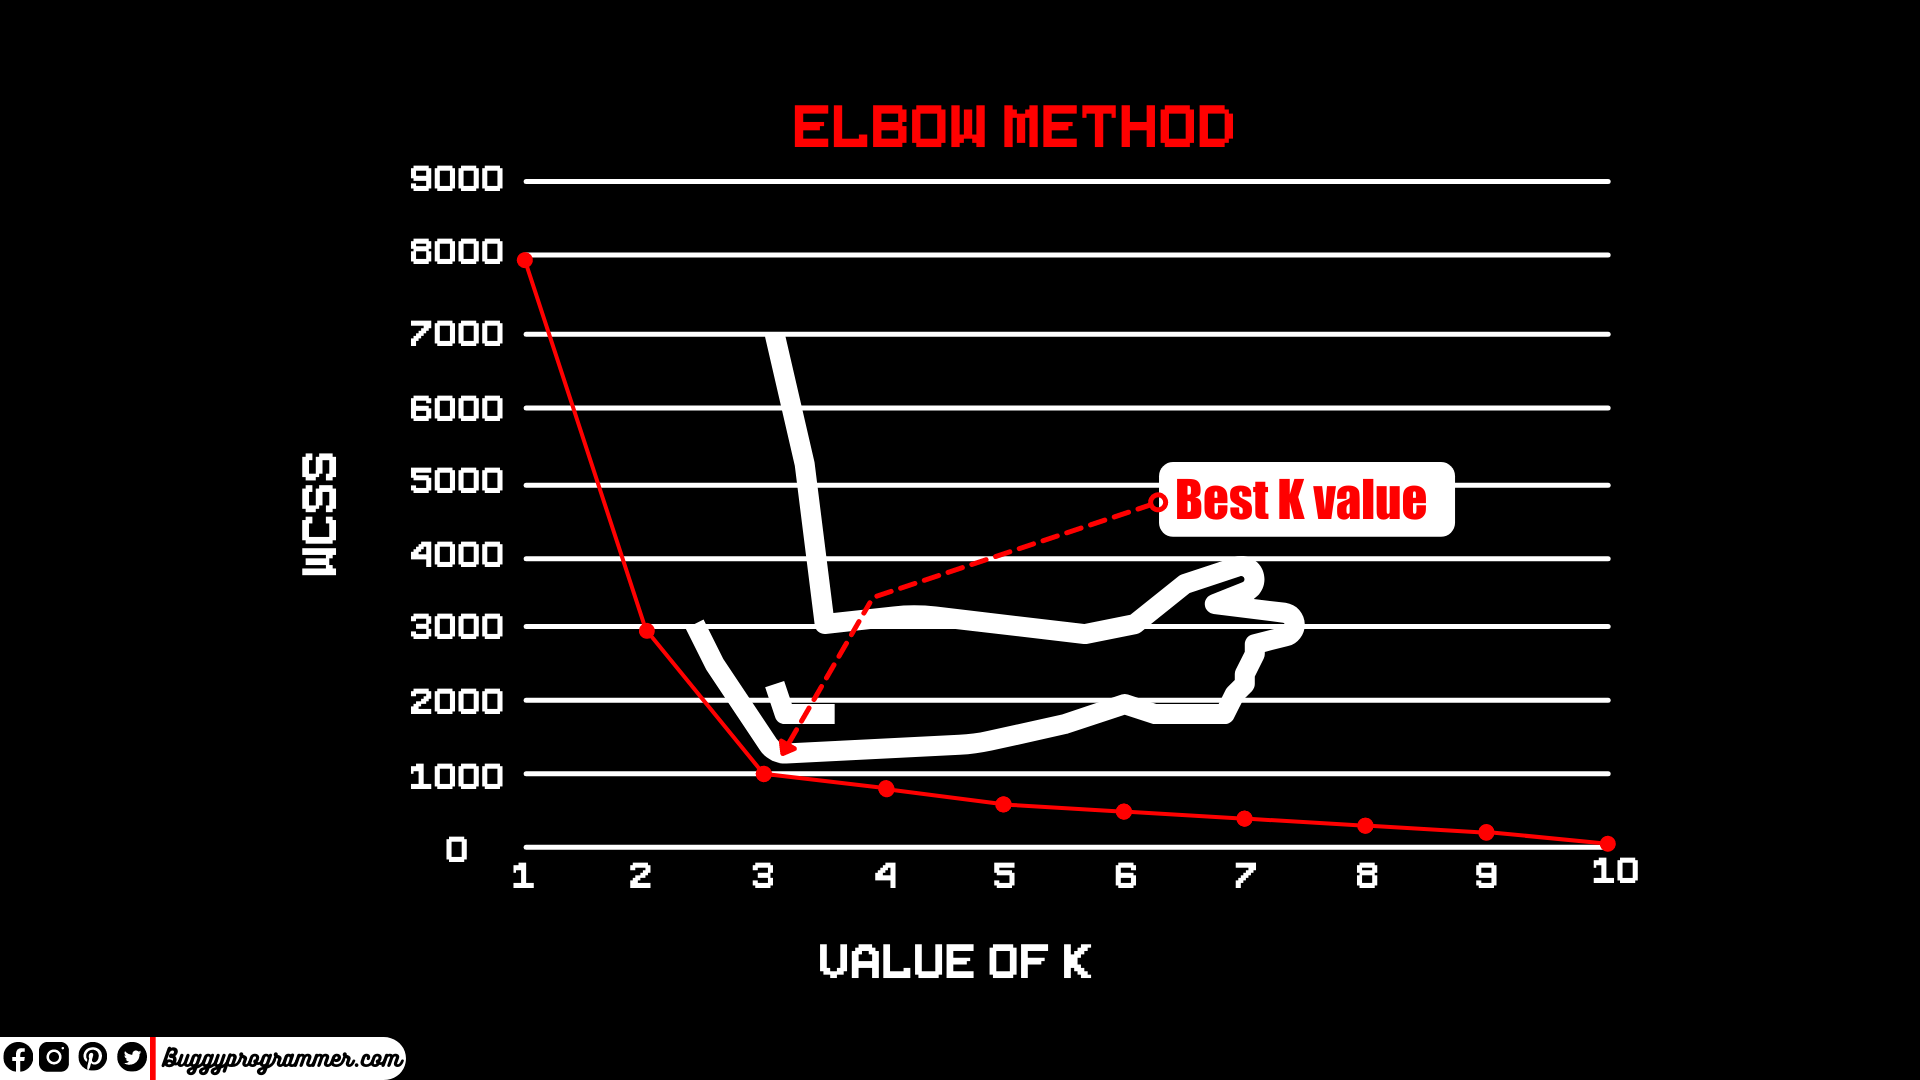

We decide the best value of `K` by first calculating `WCSS`(Within Cluster Sum of Square) of a model with different values of `K`. And then we plot the line graph out of it and search for a point where wcss score suddenly stops decreasing, usually this forms a curve like an elbow and that’s the reason it’s called elbow curve or elbow method. And the point where `WCSS` suddenly stop decreasing is considered as optimal number of cluster which is nothing but the value of `K`.
> (WCSS measures the average squared distance of each point from its centroid within a cluster. The smaller the value the more compact it is and vice versa. In short this metric is used to measure the cluster’s evaluation, if you want to learn more about it then you can read it here.)

## Building K Means Clustering Model

In [1]:
# importing requirements
import pandas as pd # <---- for handling tabular data
from sklearn.cluster import KMeans # <--- for building linear regression model
import matplotlib.pyplot as plt # <---for data visualization
import seaborn as sns # <---for data visualization
import warnings # <-- for ingoring warings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.sample(10, random_state=39)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
128,129,Male,59,71,11
20,21,Male,35,24,35
117,118,Female,49,65,59
125,126,Female,31,70,77
173,174,Male,36,87,92
191,192,Female,32,103,69
192,193,Male,33,113,8
74,75,Male,59,54,47
95,96,Male,24,60,52
44,45,Female,49,39,28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# converting gender column to numerical col
df.rename(columns={'Genre': 'Gender'}, inplace=True) # renaming gender column
df['Gender'] = df['Gender'].apply(lambda x: (0, 1)[x=='Male']) # Female:0, Male:1

In [5]:
df.sample(10, random_state=39)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
128,129,1,59,71,11
20,21,1,35,24,35
117,118,0,49,65,59
125,126,0,31,70,77
173,174,1,36,87,92
191,192,0,32,103,69
192,193,1,33,113,8
74,75,1,59,54,47
95,96,1,24,60,52
44,45,0,49,39,28


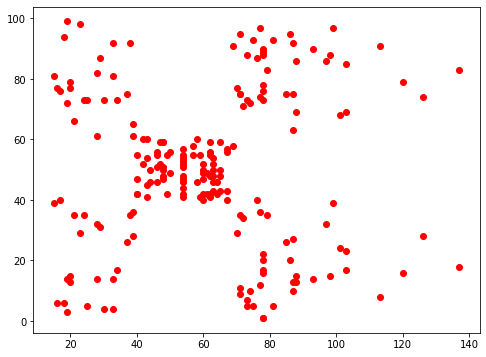

In [6]:
# let's see the customer distribution
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='red')

From the above plot we can see that we can have 5 possible cluster, so we will create 5 clusters.

In [7]:
# we will not require customerID column so we will leave it
features = df.iloc[:, [3, 4]]
features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
# let's create our model now
model = KMeans(n_clusters=5)
model.fit(features)

KMeans(n_clusters=5)

In [9]:
Cluster = model.predict(features)

In [10]:
Cluster

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [11]:
# now let's add this as a column in our dataset
df['cluster'] = Cluster
df.sample(10, random_state=39)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
128,129,1,59,71,11,3
20,21,1,35,24,35,2
117,118,0,49,65,59,1
125,126,0,31,70,77,0
173,174,1,36,87,92,0
191,192,0,32,103,69,0
192,193,1,33,113,8,3
74,75,1,59,54,47,1
95,96,1,24,60,52,1
44,45,0,49,39,28,2


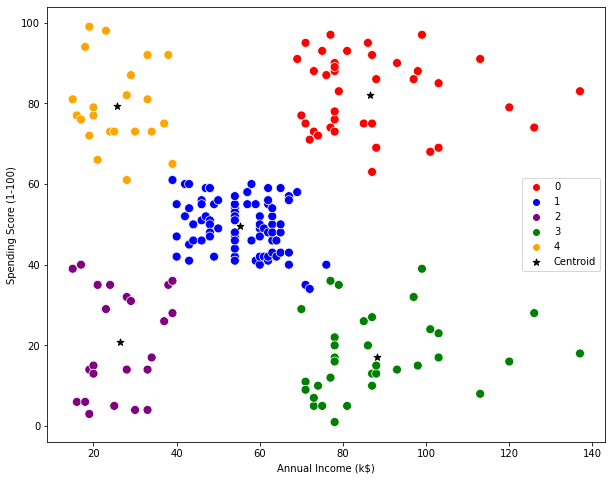

In [12]:
x = df["Annual Income (k$)"]
y = df["Spending Score (1-100)"]
z = df['cluster']
cent_x = model.cluster_centers_[:,0]
cent_y = model.cluster_centers_[:,1]
colors = ['red', 'blue', 'purple', 'green', 'orange']
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x, y, hue=z, s=80, palette=colors)
plt.scatter(cent_x, cent_y, color='black', marker='*', s=50, label='Centroid')
plt.legend()
plt.show()

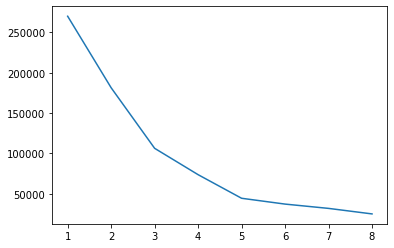

In [13]:
# now let's see optimal number of centroid with elbow method
wcss = []
for i in range(1, 9):
    temp_mdl = KMeans(n_clusters=i, random_state=15)
    temp_mdl.fit(features)
    wcss.append(temp_mdl.inertia_)

plt.plot(range(1, 9), wcss)

As we can see that wcss score is suddenly stopped decreasing after 5th cluster